In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/raj4rachit/Assignment_1_DS250723_Python/main/Machine_learning/data/mobile_price_data.csv"
df = pd.read_csv(url)

In [3]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   mobile_name    459 non-null    object
 1   mobile_price   459 non-null    object
 2   mobile_color   459 non-null    object
 3   dual_sim       459 non-null    object
 4   disp_size      459 non-null    object
 5   resolution     459 non-null    object
 6   os             459 non-null    object
 7   num_cores      459 non-null    object
 8   mp_speed       459 non-null    object
 9   int_memory     459 non-null    object
 10  ram            459 non-null    object
 11  p_cam          459 non-null    object
 12  f_cam          459 non-null    object
 13  network        459 non-null    object
 14  bluetooth      459 non-null    object
 15  battery_power  459 non-null    object
 16  mob_width      459 non-null    object
 17  mob_height     459 non-null    object
 18  mob_depth      459 non-null   

In [4]:
# Display summary statistics
df.describe()

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
count,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459
unique,363,139,165,2,36,48,18,3,18,7,7,49,15,18,1,34,70,81,55,62
top,"Vivo Z1Pro (Sonic Black, 64 GB)","₹11,999",Black,Dual Sim,16.51 cm (6.5 inch),2340 x 1080 pixels,Android Pie 9,Octa Core,2 GHz,64 GB,4 GB,13MP + 2MP,16MP Front Camera,"3G, 4G VOLTE, 4G, 2G",Yes,4000 mAh,75.6 mm,156.7 mm,8.8 mm,191 g
freq,4,19,28,458,51,66,126,444,149,185,160,72,112,139,459,135,35,23,48,27


In [26]:
df.isna().sum()

mobile_name      0
mobile_price     0
mobile_color     0
dual_sim         0
disp_size        0
resolution       0
os               0
num_cores        0
mp_speed         0
int_memory       0
ram              0
p_cam            0
f_cam            0
network          0
bluetooth        0
battery_power    0
mob_width        0
mob_height       0
mob_depth        0
mob_weight       0
dtype: int64

In [28]:
df['mob_weight']=df['mob_weight'].str.replace('g','')
df['mob_height']=df['mob_height'].str.replace('mm','')
df['mob_depth']=df['mob_depth'].str.replace('mm','')
df['mob_width']=df['mob_width'].str.replace('mm','')
df['battery_power']=df['battery_power'].str.replace('mAh','')
df['mp_speed']=df['mp_speed'].str.replace('GHz','')
df['int_memory']=df['int_memory'].str.replace('GB','')
df['ram']=df['ram'].str.replace('GB','')

In [29]:
df['bluetooth'].value_counts()

Yes    459
Name: bluetooth, dtype: int64

In [30]:
df.drop('bluetooth',axis=1,inplace=True)

In [31]:
df.head()

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,"Realme Narzo 10A (So White, 32 GB)","₹8,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2,32,3,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75,164.4,8.95,195
1,"Realme Narzo 10A (So Blue, 32 GB)","₹8,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2,32,3,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75,164.4,8.95,195
2,"Realme Narzo 10A (So Blue, 64 GB)","₹9,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2,64,4,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75,164.4,8.95,195
3,"Realme Narzo 10A (So White, 64 GB)","₹9,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2,64,4,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75,164.4,8.95,195
4,"Realme Narzo 10 (That Green, 128 GB)","₹11,999",That Green,Dual Sim,16.51 cm (6.5 inch),1600 x 720 Pixels,Android 10,Octa Core,2,128,4,48MP + 8MP + 2MP + 2MP,16MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.4,164.4,9,199


In [32]:
df['num_cores'].value_counts()

Octa Core      444
Quad Core       14
Single Core      1
Name: num_cores, dtype: int64

In [33]:
df['num_cores']=df['num_cores'].map({'Octa Core':8,'Quad Core':4,'Single Core':1})

In [34]:
df['dual_sim'].value_counts()

Dual Sim      458
Single Sim      1
Name: dual_sim, dtype: int64

In [35]:
df.drop('dual_sim',axis=1,inplace=True)

In [36]:
df['os'].unique()
df['os']=df['os'].str.replace(r'^Android\s[a-zA-Z]*\s?',r'',regex=True)
df['os'].unique()

array(['10', '9.0', '9', '8.1', '7.1.1', '8.0', '7.1.2', '4.4.2', '6.0.1',
       '7.1', '6', '7', '5.4.1', '8.1.0', '8', '5.1', '5.1.1'],
      dtype=object)

In [37]:
df[['os','hoax1','hoax2']]=df['os'].str.partition('.')

In [38]:
df.drop(['hoax1','hoax2'],axis=1,inplace=True)

In [39]:
df['os'].value_counts()

9     208
8     122
10     84
7      34
6       5
5       5
4       1
Name: os, dtype: int64

In [40]:
df['mobile_price']=df['mobile_price'].replace(['₹',','],'',regex=True)

df[['dummy1','dummy2','mobile_color']]=df['mobile_color'].str.rpartition(' ')

df.drop(['dummy1','dummy2'],axis=1,inplace=True)

df['mobile_color'].value_counts()

Blue         119
Black        115
Red           53
White         40
Gold          34
Purple        24
Green         21
Grey          14
Violet         5
Gray           4
Mint           3
Silver         3
Greener        3
Mist           2
Cyan           2
Sapphire       2
Brick          2
Concrete       2
Wave           2
Edition        2
Champagne      1
Orange         1
Brown          1
Sea            1
white          1
Ruby           1
gold           1
Name: mobile_color, dtype: int64

In [41]:
df['mobile_color']=df['mobile_color'].replace({'Greener':'Green','white':'White','gold':'Gold','Gray':'Grey'})

df[['mobile_name','dummy1','dummy2']]=df['mobile_name'].str.partition(' ')

df.drop(['dummy1','dummy2'],axis=1,inplace=True)

df['mobile_name'].value_counts()

Vivo       96
Redmi      93
OPPO       86
Realme     79
Infinix    36
POCO       31
Mi         20
Samsung    17
MI3         1
Name: mobile_name, dtype: int64

In [43]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb=MultiLabelBinarizer()
dg=pd.DataFrame(mlb.fit_transform(df['network']),columns=mlb.classes_,index=df.index)

In [44]:
dg

,,",",2,3,4,5,E,G,L,O,T,V
0,1,1,1,1,1,0,1,1,1,1,1,1
1,1,1,1,1,1,0,1,1,1,1,1,1
2,1,1,1,1,1,0,1,1,1,1,1,1
3,1,1,1,1,1,0,1,1,1,1,1,1
4,1,1,1,1,1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
454,1,1,1,1,1,0,1,1,1,1,1,1
455,1,1,1,1,1,0,1,1,1,1,1,1
456,1,1,1,1,1,0,0,1,0,0,0,0
457,1,1,1,1,1,0,1,1,1,1,1,1


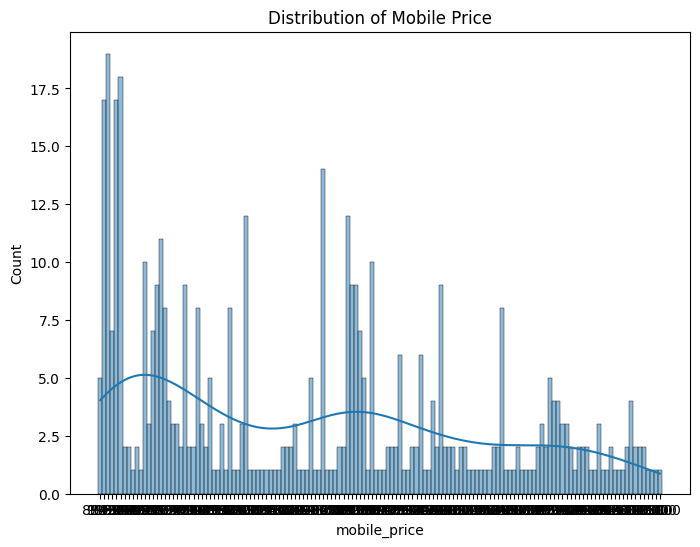

In [45]:
# Explore the distribution of the target variable 'price_range'
plt.figure(figsize=(8, 6))
sns.histplot(df['mobile_price'], bins=30, kde=True)
plt.title('Distribution of Mobile Price')
plt.show()

In [46]:
df=pd.merge(df,dg,left_index=True,right_index=True)

df.drop('network',axis=1,inplace=True)

In [48]:
df_mobile_name=pd.get_dummies(df['mobile_name'],dtype=int)
df_mobile_color=pd.get_dummies(df['mobile_color'],dtype=int)

In [50]:
df=pd.concat([df,df_mobile_name,df_mobile_color],axis=1)

df.drop(['mobile_name','mobile_color'],axis=1,inplace=True)

In [51]:
int_col_list=['mobile_price', 'os',  'int_memory', 'ram',
       'battery_power',
       'p_cam_max', 'f_cam_max']

<ipython-input-63-c3a4753b30d1>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df.corr())
<ipython-input-63-c3a4753b30d1>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),mask=mask, annot=True)


<Axes: >

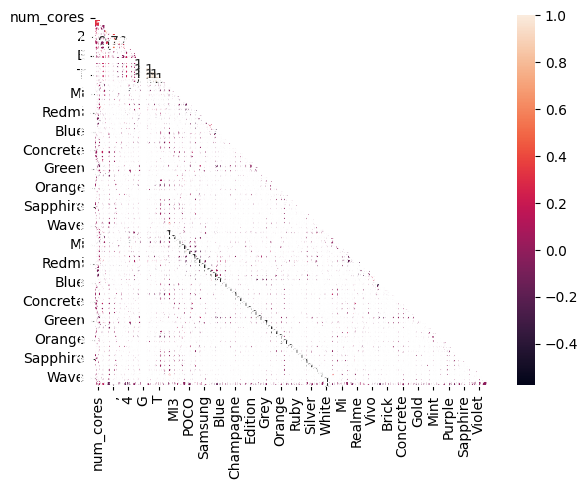

In [63]:
import seaborn as sns
import numpy as np

mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df.corr(),mask=mask, annot=True)